In [102]:
import pandas as pd
import matplotlib.pyplot as plt
clients=pd.read_excel(r"C:\Users\New\Desktop\Bikram_WebTech_BusinessPerformance.xlsx",sheet_name=0)
projects=pd.read_excel(r"C:\Users\New\Desktop\Bikram_WebTech_BusinessPerformance.xlsx",sheet_name=1)
finance=pd.read_excel(r"C:\Users\New\Desktop\Bikram_WebTech_BusinessPerformance.xlsx",sheet_name=2)
productivity=pd.read_excel(r"C:\Users\New\Desktop\Bikram_WebTech_BusinessPerformance.xlsx",sheet_name=3)

In [103]:
# Check top rows
print(clients.head())
print(projects.head())
print(finance.head())
print(productivity.head())

# Check column types
print(clients.info())
print(projects.info())
print(finance.info())
print(productivity.info())

# Check for missing values
print(clients.isnull().sum())
print(projects.isnull().sum())
print(finance.isnull().sum())
print(productivity.isnull().sum())


  ClientID ClientName AcquisitionDate ClientType
0     C001   Client_1      2023-07-01        New
1     C002   Client_2      2023-04-01     Repeat
2     C003   Client_3      2023-11-01        New
3     C004   Client_4      2023-08-01        New
4     C005   Client_5      2023-05-01        New
  ProjectID ClientID        ServiceType  StartDate  DurationDays     Status  \
0      P001     C033    Web Development 2023-09-30           114    Ongoing   
1      P002     C048    Web Development 2023-04-14            48  Completed   
2      P003     C023  Digital Marketing 2023-10-26            66    Delayed   
3      P004     C024                SEO 2023-09-03           109    Delayed   
4      P005     C037       UI/UX Design 2023-06-25            24    Delayed   

     EndDate  
0 2024-01-22  
1 2023-06-01  
2 2023-12-31  
3 2023-12-21  
4 2023-07-19  
       Month  Revenue  Expenses  Profit
0 2023-01-01   103932     63125   40807
1 2023-02-01   198172     69922  128250
2 2023-03-01   107091

In [104]:
# Lowercase and replace spaces
clients.columns = clients.columns.str.strip().str.lower().str.replace(' ', '_')
projects.columns = projects.columns.str.strip().str.lower().str.replace(' ', '_')
finance.columns = finance.columns.str.strip().str.lower().str.replace(' ', '_')
productivity.columns = productivity.columns.str.strip().str.lower().str.replace(' ', '_')


In [105]:
clients['acquisitiondate'] = pd.to_datetime(clients['acquisitiondate'], errors='coerce')
projects['startdate'] = pd.to_datetime(projects['startdate'], errors='coerce')
projects['enddate'] = pd.to_datetime(projects['enddate'], errors='coerce')
finance['month'] = pd.to_datetime(finance['month'], errors='coerce')


In [106]:
# Project duration (if not present)
projects['duration_days'] = (projects['enddate'] - projects['startdate']).dt.days

# Month-Year for grouping
finance['month_year'] = finance['month'].dt.to_period('M')
projects['month_year'] = projects['startdate'].dt.to_period('M')
clients['month_year'] = clients['acquisitiondate'].dt.to_period('M')


In [107]:
clients.drop_duplicates(inplace=True)
projects.drop_duplicates(inplace=True)
finance.drop_duplicates(inplace=True)
productivity.drop_duplicates(inplace=True)


In [108]:
# Ensure numeric columns are numeric
finance[['revenue', 'expenses', 'profit']] = finance[['revenue', 'expenses', 'profit']].apply(pd.to_numeric, errors='coerce')
productivity[['billablehours', 'nonbillablehours']] = productivity[['billablehours', 'nonbillablehours']].apply(pd.to_numeric, errors='coerce')
projects['duration_days'] = pd.to_numeric(projects['duration_days'], errors='coerce')


In [109]:
# Total revenue
print(finance['revenue'].sum())

# Number of new vs repeat clients
print(clients['clienttype'].value_counts())

# Average project duration
print(projects['duration_days'].mean())

# Billable hours %
billable_pct = productivity['billablehours'].sum() / (productivity['billablehours'].sum() + productivity['nonbillablehours'].sum()) * 100
print(f"Billable Hours %: {billable_pct:.2f}%")


1494718
clienttype
New       35
Repeat    15
Name: count, dtype: int64
67.53333333333333
Billable Hours %: 79.97%


In [110]:
projects_clients = projects.merge(clients, how='left', on='clientid')


In [111]:
projects_clients

,projectid,clientid,servicetype,startdate,durationdays,status,enddate,duration_days,month_year_x,clientname,acquisitiondate,clienttype,month_year_y
0,P001,C033,Web Development,2023-09-30,114,Ongoing,2024-01-22,114,2023-09,Client_33,2023-01-01,New,2023-01
1,P002,C048,Web Development,2023-04-14,48,Completed,2023-06-01,48,2023-04,Client_48,2023-05-01,Repeat,2023-05
2,P003,C023,Digital Marketing,2023-10-26,66,Delayed,2023-12-31,66,2023-10,Client_23,2023-06-01,Repeat,2023-06
3,P004,C024,SEO,2023-09-03,109,Delayed,2023-12-21,109,2023-09,Client_24,2023-02-01,New,2023-02
4,P005,C037,UI/UX Design,2023-06-25,24,Delayed,2023-07-19,24,2023-06,Client_37,2023-12-01,New,2023-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,P116,C034,Mobile App Development,2023-01-23,66,Ongoing,2023-03-30,66,2023-01,Client_34,2023-11-01,New,2023-11
116,P117,C006,Mobile App Development,2023-09-07,99,Completed,2023-12-15,99,2023-09,Client_6,2023-07-01,New,2023-07
117,P118,C022,SEO,2023-01-10,114,Completed,2023-05-04,114,2023-01,Client_22,2023-12-01,Repeat,2023-12
118,P119,C011,Mobile App Development,2023-09-03,67,Completed,2023-11-09,67,2023-09,Client_11,2023-11-01,New,2023-11


In [112]:
# Create Month-Year columns
projects_clients['month_year'] = projects_clients['startdate'].dt.to_period('M')
finance['month_year'] = finance['month'].dt.to_period('M')

# Merge projects with monthly finance
projects_clients_finance = projects_clients.merge(finance,
                                                  how='left', on='month_year')


In [113]:
#A. Service Demand (Projects by Service Type & Month)
service_demand = projects_clients.groupby(['servicetype','month_year']).agg(
    total_projects = ('projectid','count')
).reset_index()

print(service_demand.head())


         servicetype month_year  total_projects
0  Digital Marketing    2023-02               4
1  Digital Marketing    2023-03               3
2  Digital Marketing    2023-04               3
3  Digital Marketing    2023-05               1
4  Digital Marketing    2023-06               4


In [114]:
# Client Acquisition (New vs Repeat per Month)
client_acquisition = clients.groupby(['clienttype','month_year']).agg(
    total_clients = ('clientid','count')
).reset_index()

print(client_acquisition.head())


  clienttype month_year  total_clients
0        New    2023-01              1
1        New    2023-02              2
2        New    2023-03              3
3        New    2023-04              1
4        New    2023-05              4


In [115]:
# Aggregate revenue per client
client_revenue = projects_clients_finance.groupby(['clientid','clientname']).agg(
    total_revenue=('revenue','sum')
).reset_index()

# Top 10 clients
top_clients = client_revenue.sort_values('total_revenue', ascending=False).head(10)
print(top_clients)


   clientid clientname  total_revenue
26     C032  Client_32        1004630
31     C037  Client_37         734753
27     C033  Client_33         695538
1      C002   Client_2         683693
42     C049  Client_49         663047
5      C006   Client_6         660981
19     C024  Client_24         647124
23     C028  Client_28         642333
38     C044  Client_44         628061
13     C015  Client_15         506704


In [116]:
# Project Delivery Analysis
# Projects by Status
project_status = projects.groupby('status').agg(
    total_projects=('projectid','count')
).reset_index()

# Avg Duration by Month
avg_duration = projects.groupby(projects['startdate'].dt.to_period('M')).agg(
    avg_duration_days=('duration_days','mean')
).reset_index()

print(project_status)
print(avg_duration.head())


      status  total_projects
0  Completed              74
1    Delayed              20
2    Ongoing              26
  startdate  avg_duration_days
0   2023-01          61.285714
1   2023-02          55.583333
2   2023-03          79.428571
3   2023-04          61.461538
4   2023-05          60.461538


In [117]:
# Monthly Revenue, Expenses, Profit
monthly_finance = finance.groupby(finance['month'].dt.to_period('M')).agg(
    revenue=('revenue','sum'),
    expenses=('expenses','sum'),
    profit=('profit','sum')
).reset_index()

print(monthly_finance.head())


     month  revenue  expenses  profit
0  2023-01   103932     63125   40807
1  2023-02   198172     69922  128250
2  2023-03   107091     52049   55042
3  2023-04    71949     57131   14818
4  2023-05    87744     62944   24800


In [118]:
# Total Billable and Non-billable hours by Department
dept_productivity = productivity.groupby('department').agg(
    total_billable=('billablehours','sum'),
    total_nonbillable=('nonbillablehours','sum')
).reset_index()

# Billable percentage
dept_productivity['billable_pct'] = dept_productivity['total_billable'] / \
    (dept_productivity['total_billable'] + dept_productivity['total_nonbillable']) * 100

print(dept_productivity)


    department  total_billable  total_nonbillable  billable_pct
0  Development            3365                728     82.213535
1    Marketing            3019                834     78.354529
2   Operations            2318                518     81.734838
3        Sales            2869                814     77.898452
4      Support            3110                782     79.907503


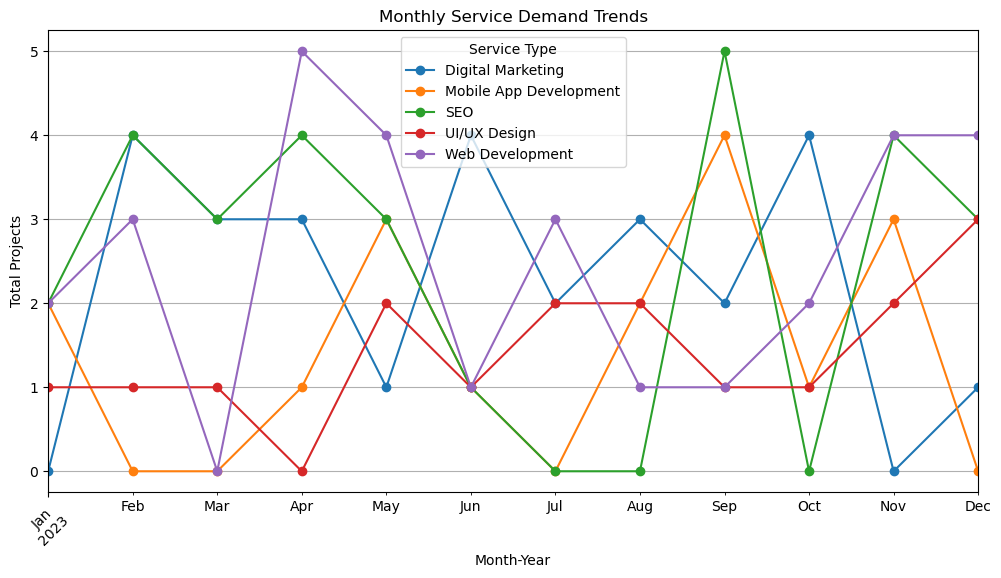

In [119]:
service_demand = projects_clients.groupby(['month_year','servicetype']).agg(
    total_projects=('projectid','count')
).reset_index()

# Pivot for plotting
service_pivot = service_demand.pivot(index='month_year', columns='servicetype', values='total_projects').fillna(0)

# Plot
service_pivot.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Monthly Service Demand Trends")
plt.xlabel("Month-Year")
plt.ylabel("Total Projects")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Service Type")
plt.show()


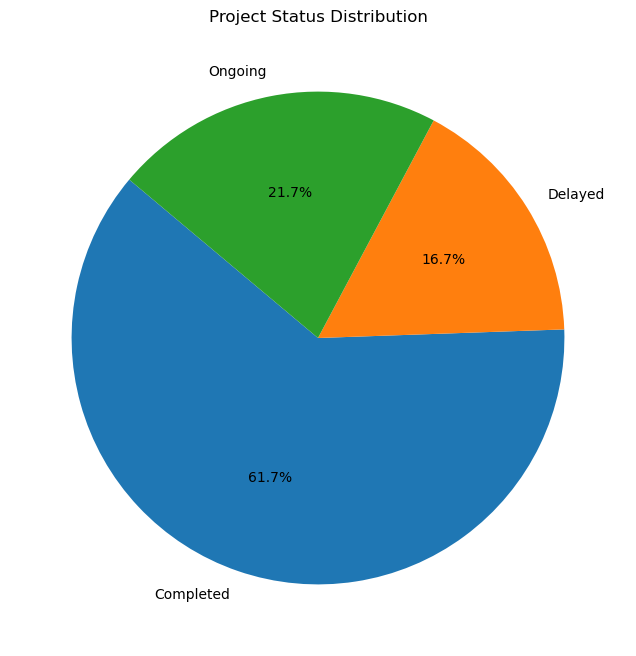

In [121]:
project_status = projects_clients.groupby('status').agg(
    total_projects=('projectid','count')
).reset_index()

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(project_status['total_projects'], labels=project_status['status'], autopct='%1.1f%%', startangle=140)
plt.title("Project Status Distribution")
plt.show()
